# Homework 2

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import pandas as pd

## Problem 2

In [142]:
dataset = np.array([[1, -2, 4, -1, -1], 
           [1, 4, 1, -1, -1],
           [1, 1, 6, -1, 1],
           [1, 2, 4, -1, 1],
           [1, 6, 2, -1, 1]])

y = dataset[:,-1:]
A = dataset[:,:-1]
print(A)
print(y)

[[ 1 -2  4 -1]
 [ 1  4  1 -1]
 [ 1  1  6 -1]
 [ 1  2  4 -1]
 [ 1  6  2 -1]]
[[-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]


In [143]:
def initialize_weights(num_features):
    return np.random.rand(num_features, 1)

def perceptron_forward_pass(A, weights):
    return A @ weights

def perceptron_cost(y_preds, y): 
    return 1 / len(y) * np.sum((-y_preds * y))

def perceptron_gradient(cost, A, y):
    return -A.T * y

weights = initialize_weights(A.shape[1])
alpha = 0.01
costs = []
for i in range(50):
    cost = 0
    for _example, _target in zip(A, y):

        # Adds a dimention since we lose one
        example = _example[np.newaxis, :]
        target = _target[:, np.newaxis]

        prediction = perceptron_forward_pass(example, weights)
        error = perceptron_cost(prediction, target)

        if (error > 0):
            cost += error
            gradient = perceptron_gradient(error, example, target)
            weights -= alpha * gradient

    print(f"Iteration: {i}")
    print(f"Cost: {i}")
    print(f"Predictions:\n {perceptron_forward_pass(A, weights)}")
    print(f"Weights:\n {weights}\n")

    costs.append(cost)
    if (cost == 0):
        break


Iteration: 0
Cost: 0
Predictions:
 [[-0.85209384]
 [ 3.78059931]
 [ 2.08648968]
 [ 2.59193223]
 [ 5.68039433]]
Weights:
 [[0.45997078]
 [0.86100652]
 [0.17778198]
 [0.30117953]]

Iteration: 1
Cost: 1
Predictions:
 [[-0.83209384]
 [ 3.59059931]
 [ 1.96648968]
 [ 2.45193223]
 [ 5.40039433]]
Weights:
 [[0.44997078]
 [0.82100652]
 [0.16778198]
 [0.31117953]]

Iteration: 2
Cost: 2
Predictions:
 [[-0.81209384]
 [ 3.40059931]
 [ 1.84648968]
 [ 2.31193223]
 [ 5.12039433]]
Weights:
 [[0.43997078]
 [0.78100652]
 [0.15778198]
 [0.32117953]]

Iteration: 3
Cost: 3
Predictions:
 [[-0.79209384]
 [ 3.21059931]
 [ 1.72648968]
 [ 2.17193223]
 [ 4.84039433]]
Weights:
 [[0.42997078]
 [0.74100652]
 [0.14778198]
 [0.33117953]]

Iteration: 4
Cost: 4
Predictions:
 [[-0.77209384]
 [ 3.02059931]
 [ 1.60648968]
 [ 2.03193223]
 [ 4.56039433]]
Weights:
 [[0.41997078]
 [0.70100652]
 [0.13778198]
 [0.34117953]]

Iteration: 5
Cost: 5
Predictions:
 [[-0.75209384]
 [ 2.83059931]
 [ 1.48648968]
 [ 1.89193223]
 [ 4.28039

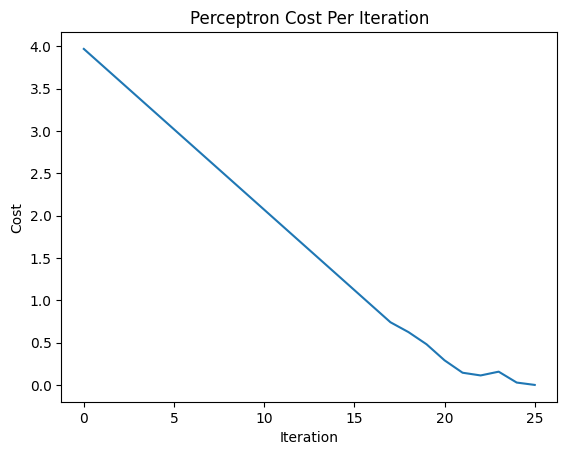

In [144]:
def plot_costs(costs):
    plt.plot(costs)
    plt.title("Perceptron Cost Per Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

plot_costs(costs)

In [145]:
def quantizer(predictions):
    quantized_preds = []
    for prediction in predictions: 
        if (prediction < 0):
            quantized_preds.append(-1)
        else:
            quantized_preds.append(1)
    return quantized_preds

predictions = perceptron_forward_pass(A, weights)
quant_preds = quantizer(predictions)

print("Accuracy:%.2f " %accuracy_score(y, quant_preds))

num_mis_classified = 0
for pred, target in zip(quant_preds, y):
    if pred != target:
        num_mis_classified += 1

print(f"Num misclassified: {num_mis_classified}")

Accuracy:1.00 
Num misclassified: 0


## Problem 4 & Problem 5

In [146]:
def get_data(csv_path):
    df = pd.read_csv(csv_path)
    x = df.iloc[:,0:3].values
    y = np.array(df['y'])
    y = y[:, np.newaxis]

    # Split the data into a train and test split
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=1/3) 

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Compact Notation
    ones_ = np.ones(len(Y_train), float)
    A_train = np.column_stack((ones_, X_train_std))

    ones_ = np.ones(len(Y_test))
    A_test = np.column_stack((ones_, X_test_std))
    return A_train, A_test, Y_train, Y_test

def mse_cost(Y_pred, Y):
    error = (Y_pred - Y) ** 2
    return np.sum(error) / len(Y)

def adaline_gradient(Y_pred, A, Y):
    return 2 / len(Y) * (A.T @ (Y_pred - Y))

## Dataset 1

Iteration: 0, Total Error: 1.8781163500218505
Iteration: 1, Total Error: 1.3193647902295924
Iteration: 2, Total Error: 0.9616581575380002
Iteration: 3, Total Error: 0.7325222202166362
Iteration: 4, Total Error: 0.5856583448641915
Iteration: 5, Total Error: 0.49147162921815524
Iteration: 6, Total Error: 0.4310330415639752
Iteration: 7, Total Error: 0.3922282096195724
Iteration: 8, Total Error: 0.3672994427273802
Iteration: 9, Total Error: 0.3512760042647909
Iteration: 10, Total Error: 0.34097103217065866
Iteration: 11, Total Error: 0.3343401671898719
Iteration: 12, Total Error: 0.3300712106756644
Iteration: 13, Total Error: 0.3273214351981386
Iteration: 14, Total Error: 0.325549318392913
Iteration: 15, Total Error: 0.32440669635975666
Iteration: 16, Total Error: 0.3236696014325407
Iteration: 17, Total Error: 0.32319388277783373
Iteration: 18, Total Error: 0.32288671322984225
Iteration: 19, Total Error: 0.32268828540000355
Iteration: 20, Total Error: 0.32256004683677747
Iteration: 21, To

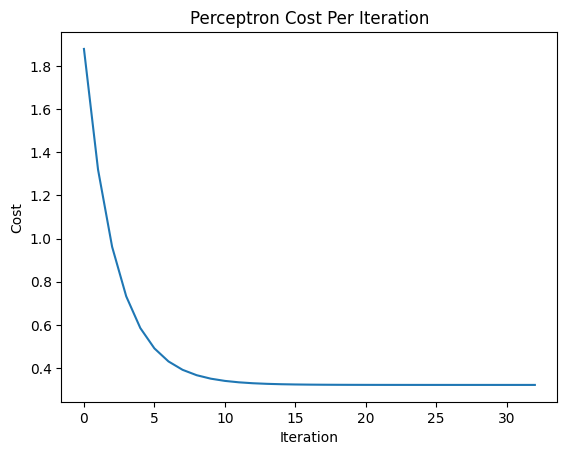

In [147]:
A_train, A_test, Y_train, Y_test = get_data("Dataset_1.csv")

t = 0
epochs = 100
tol = 1e-6
last_total_error = 100
total_error = 0
costs = []
alpha = 0.1
weights = initialize_weights(A_train.shape[1])

while (t < epochs and abs(last_total_error - total_error) > tol):
    last_total_error = total_error
    Y_pred = perceptron_forward_pass(A_train, weights)
    gradient = adaline_gradient(Y_pred, A_train, Y_train)
    weights -= alpha * gradient
    total_error = mse_cost(Y_pred, Y_train)
    costs.append(total_error)
    print(f"Iteration: {t}, Total Error: {total_error}")
    t += 1

plot_costs(costs)

In [148]:
train_preds = perceptron_forward_pass(A_train, weights)
quant_train_preds = quantizer(train_preds)
train_acc = accuracy_score(quant_train_preds, Y_train)
print(f"Train accuracy: {train_acc}, Train Misclassifications: {round((1 - train_acc) * len(Y_train))}")

test_preds = perceptron_forward_pass(A_test, weights)
quant_test_preds = quantizer(test_preds)
test_acc = accuracy_score(quant_test_preds, Y_test)
print(f"Test accuracy: {test_acc}, Test Misclassification: {round((1 - test_acc) * len(Y_test))}")

Train accuracy: 0.978978978978979, Train Misclassifications: 7
Test accuracy: 0.9640718562874252, Test Misclassification: 6


## See how Sk Learn Perceptron Performs

In [149]:
clf = Perceptron(tol=tol, random_state=0)
clf.fit(A_train[:,1:], Y_train)

train_preds = clf.predict(A_train[:,1:])
quant_train_preds = quantizer(train_preds)
train_acc = accuracy_score(quant_train_preds, Y_train)
print(f"Train accuracy: {train_acc}, Train Misclassifications: {round((1 - train_acc) * len(Y_train))}")

test_preds = clf.predict(A_test[:,1:])
quant_test_preds = quantizer(test_preds)
test_acc = accuracy_score(quant_test_preds, Y_test)
print(f"Test accuracy: {test_acc}, Test Misclassification: {round((1 - test_acc) * len(Y_test))}")

Train accuracy: 0.987987987987988, Train Misclassifications: 4
Test accuracy: 0.9700598802395209, Test Misclassification: 5


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Dataset 2

Iteration: 0, Total Error: 1.578445094562607
Iteration: 1, Total Error: 1.123732940097416
Iteration: 2, Total Error: 0.8325409106197462
Iteration: 3, Total Error: 0.6460644422023374
Iteration: 4, Total Error: 0.5266463230354665
Iteration: 5, Total Error: 0.45017157356953924
Iteration: 6, Total Error: 0.401197351006119
Iteration: 7, Total Error: 0.3698342716980238
Iteration: 8, Total Error: 0.34974928693756846
Iteration: 9, Total Error: 0.33688676916090393
Iteration: 10, Total Error: 0.3286495210537621
Iteration: 11, Total Error: 0.32337430816610285
Iteration: 12, Total Error: 0.3199959979578737
Iteration: 13, Total Error: 0.31783247873638165
Iteration: 14, Total Error: 0.31644692397536756
Iteration: 15, Total Error: 0.3155595874814746
Iteration: 16, Total Error: 0.3149913175072675
Iteration: 17, Total Error: 0.3146273833645307
Iteration: 18, Total Error: 0.31439431001132834
Iteration: 19, Total Error: 0.3142450428800469
Iteration: 20, Total Error: 0.314149447370161
Iteration: 21, Total

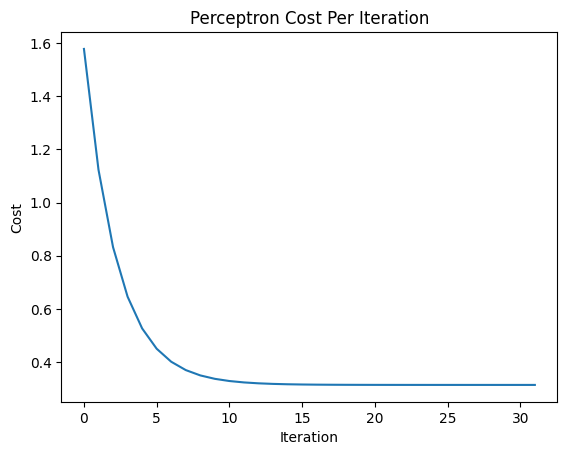

In [150]:
A_train, A_test, Y_train, Y_test = get_data("Dataset_2.csv")

t = 0
epochs = 100
tol = 1e-6
last_total_error = 100
total_error = 0
costs = []
alpha = 0.1
weights = initialize_weights(A_train.shape[1])

while (t < epochs and abs(last_total_error - total_error) > tol):
    last_total_error = total_error
    Y_pred = perceptron_forward_pass(A_train, weights)
    gradient = adaline_gradient(Y_pred, A_train, Y_train)
    weights -= alpha * gradient
    total_error = mse_cost(Y_pred, Y_train)
    costs.append(total_error)
    print(f"Iteration: {t}, Total Error: {total_error}")
    t += 1

plot_costs(costs)

In [151]:
train_preds = perceptron_forward_pass(A_train, weights)
quant_train_preds = quantizer(train_preds)
train_acc = accuracy_score(quant_train_preds, Y_train)
print(f"Train accuracy: {train_acc}, Train Misclassifications: {round((1 - train_acc) * len(Y_train))}")

test_preds = perceptron_forward_pass(A_test, weights)
quant_test_preds = quantizer(test_preds)
test_acc = accuracy_score(quant_test_preds, Y_test)
print(f"Test accuracy: {test_acc}, Test Misclassification: {round((1 - test_acc) * len(Y_test))}")

Train accuracy: 0.9369369369369369, Train Misclassifications: 21
Test accuracy: 0.9281437125748503, Test Misclassification: 12


In [152]:
clf = Perceptron(tol=tol, random_state=0)
clf.fit(A_train[:,1:], Y_train)

train_preds = clf.predict(A_train[:,1:])
quant_train_preds = quantizer(train_preds)
train_acc = accuracy_score(quant_train_preds, Y_train)
print(f"Train accuracy: {train_acc}, Train Misclassifications: {round((1 - train_acc) * len(Y_train))}")

test_preds = clf.predict(A_test[:,1:])
quant_test_preds = quantizer(test_preds)
test_acc = accuracy_score(quant_test_preds, Y_test)
print(f"Test accuracy: {test_acc}, Test Misclassification: {round((1 - test_acc) * len(Y_test))}")

Train accuracy: 0.948948948948949, Train Misclassifications: 17
Test accuracy: 0.9520958083832335, Test Misclassification: 8


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
